# PREDICTING BOTTOM HOLE PRESSURE USING MACHINE LEARNING
#####  In the case of well control when using the choke, the bottom hole pressure is estimated to be equal to sum of hydrostatic pressure, annulus pressures losses and the backup pressure hold by the choke. 

### IMPORTING LIBRARIES AND LOADING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
xls = pd.ExcelFile('volve_production_data.xlsx')
df = pd.read_excel(xls, 'Daily Production Data') 

In [3]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


### DATA CLEANING AND PREPOCESSING

In [4]:
# Lets see all columns first
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [5]:
# Rename column names to a more appropriate one 
column_names = {
    'DATEPRD': 'DATE',
    'WELL_BORE_CODE': 'WELL_ID',
    'NPD_WELL_BORE_CODE': 'WELL_NAME_CODE',
    'NPD_WELL_BORE_NAME': 'WELL_NAME',
    'NPD_FIELD_CODE': 'FIELD_CODE',
    'NPD_FIELD_NAME': 'FIELD_NAME',
    'NPD_FACILITY_CODE': 'FACILITY_CODE',
    'NPD_FACILITY_NAME': 'FACILITY_NAME',
    'ON_STREAM_HRS': 'ON_STREAM_HRS',
    'AVG_DOWNHOLE_PRESSURE': 'BH_PRESSURE',
    'AVG_DOWNHOLE_TEMPERATURE': 'BH_TEMPERATURE',
    'AVG_DP_TUBING': 'DP_TUBING',
    'AVG_ANNULUS_PRESS': 'CASING_PRESSURE',
    'AVG_CHOKE_SIZE_P': 'CHOKE_SIZE_PERCENTAGE',
    'AVG_CHOKE_UOM': 'CHOKE_UNITS',
    'AVG_WHP_P': 'WH_PRESSURE',
    'AVG_WHT_P': 'WH_TEMPERATURE',
    'DP_CHOKE_SIZE': 'DP_CHOKE_SIZE',
    'BORE_OIL_VOL': 'OIL_VOL',
    'BORE_GAS_VOL': 'GAS_VOL',
    'BORE_WAT_VOL': 'WAT_VOL',
    'BORE_WI_VOL': 'WATER_INJ_VOL',
    'FLOW_KIND': 'FLOW_KIND',
    'WELL_TYPE': 'WELL_TYPE'
}

df.rename(columns=column_names, inplace = True)

In [6]:
df.head(2)

,DATE,WELL_ID,WELL_NAME_CODE,WELL_NAME,FIELD_CODE,FIELD_NAME,FACILITY_CODE,FACILITY_NAME,ON_STREAM_HRS,BH_PRESSURE,...,CHOKE_UNITS,WH_PRESSURE,WH_TEMPERATURE,DP_CHOKE_SIZE,OIL_VOL,GAS_VOL,WAT_VOL,WATER_INJ_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP


In [7]:
# Drop columns irrelevant to our objective (not relating to bottom hole pressure)
df2 = df.drop(['DATE', 'WELL_ID', 'WELL_NAME_CODE', 'WELL_NAME', 'FIELD_CODE','FIELD_NAME', 'FACILITY_CODE', 'FACILITY_NAME', 'ON_STREAM_HRS','CASING_PRESSURE','DP_CHOKE_SIZE', 
         'CHOKE_UNITS','WATER_INJ_VOL','FLOW_KIND'],axis = 1)

In [8]:
# Selecting only oil producer well for our prediction

df3 =df2[df2['WELL_TYPE']=='OP']
df_prod = df3.drop(['WELL_TYPE'],axis = 1)
df_prod.head(3)

,BH_PRESSURE,BH_TEMPERATURE,DP_TUBING,CHOKE_SIZE_PERCENTAGE,WH_PRESSURE,WH_TEMPERATURE,OIL_VOL,GAS_VOL,WAT_VOL
1,NaN,NaN,NaN,1.003059,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,0.979008,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,0.545759,0.0,0.0,0.0,0.0,0.0


In [9]:
df_prod.describe()

,BH_PRESSURE,BH_TEMPERATURE,DP_TUBING,CHOKE_SIZE_PERCENTAGE,WH_PRESSURE,WH_TEMPERATURE,OIL_VOL,GAS_VOL,WAT_VOL
count,8978.000000,8978.000000,8978.000000,8901.000000,9137.000000,9129.000000,9143.000000,9143.000000,9143.000000
mean,181.820413,77.168114,154.045010,55.186725,45.442082,67.801178,1097.433089,161310.558658,1675.344996
std,109.707241,45.654600,76.743653,36.666334,24.726268,27.669018,1324.191424,188224.781732,1707.141019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000
25%,0.000000,0.000000,84.163947,18.992216,31.175563,56.848805,190.890000,29440.970000,20.765000
50%,232.927076,103.186689,175.603884,52.106021,37.989435,80.093188,559.220000,87857.650000,1108.050000
75%,255.405756,106.276408,204.335726,99.923984,57.183170,88.072977,1346.340000,202861.570000,3263.625000
max,397.588550,108.502178,345.906770,100.000000,137.311030,93.509584,5901.840000,851131.520000,8019.740000


In [10]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9143 entries, 1 to 15632
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BH_PRESSURE            8978 non-null   float64
 1   BH_TEMPERATURE         8978 non-null   float64
 2   DP_TUBING              8978 non-null   float64
 3   CHOKE_SIZE_PERCENTAGE  8901 non-null   float64
 4   WH_PRESSURE            9137 non-null   float64
 5   WH_TEMPERATURE         9129 non-null   float64
 6   OIL_VOL                9143 non-null   float64
 7   GAS_VOL                9143 non-null   float64
 8   WAT_VOL                9143 non-null   float64
dtypes: float64(9)
memory usage: 714.3 KB


In [11]:
#checking for duplicates
df_prod.duplicated()
df_prod.drop_duplicates()

,BH_PRESSURE,BH_TEMPERATURE,DP_TUBING,CHOKE_SIZE_PERCENTAGE,WH_PRESSURE,WH_TEMPERATURE,OIL_VOL,GAS_VOL,WAT_VOL
1,NaN,NaN,NaN,1.003059,0.00000,0.00000,0.0,0.0,0.0
2,NaN,NaN,NaN,0.979008,0.00000,0.00000,0.0,0.0,0.0
3,NaN,NaN,NaN,0.545759,0.00000,0.00000,0.0,0.0,0.0
4,310.37614,96.87589,277.27826,1.215987,33.09788,10.47992,0.0,0.0,0.0
5,303.50078,96.92339,281.44744,3.087015,22.05334,8.70429,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15628,NaN,NaN,NaN,0.673718,0.08545,0.22889,0.0,0.0,0.0
15629,NaN,NaN,NaN,0.636088,0.07776,0.22879,0.0,0.0,0.0
15630,NaN,NaN,NaN,0.670794,0.08545,0.22914,0.0,0.0,0.0
15631,NaN,NaN,NaN,0.664393,0.08544,0.22896,0.0,0.0,0.0


In [12]:
df_prod.isna().sum()

BH_PRESSURE              165
BH_TEMPERATURE           165
DP_TUBING                165
CHOKE_SIZE_PERCENTAGE    242
WH_PRESSURE                6
WH_TEMPERATURE            14
OIL_VOL                    0
GAS_VOL                    0
WAT_VOL                    0
dtype: int64

In [13]:
df_prod.dropna(inplace=True)
df_prod.reset_index(inplace=True, drop=True)
df_prod.isna().sum()

BH_PRESSURE              0
BH_TEMPERATURE           0
DP_TUBING                0
CHOKE_SIZE_PERCENTAGE    0
WH_PRESSURE              0
WH_TEMPERATURE           0
OIL_VOL                  0
GAS_VOL                  0
WAT_VOL                  0
dtype: int64

<AxesSubplot:xlabel='BH_PRESSURE'>

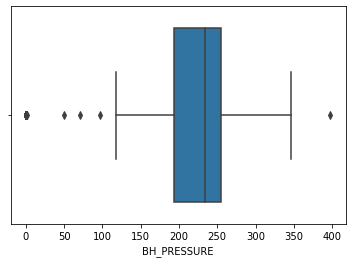

In [14]:
#cHECKING FOR OUTLIERS
import seaborn as sns
sns.boxplot(x= df_prod['BH_PRESSURE'])

In [15]:
#Handling outliers
Q1 = df_prod['BH_PRESSURE'].quantile(0.25)
Q3 = df_prod['BH_PRESSURE'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_prod['BH_PRESSURE'] >= Q1 - 1.5 * IQR) & (df_prod['BH_PRESSURE'] <= Q3 + 1.5 *IQR)
df_prod.loc[filter]

,BH_PRESSURE,BH_TEMPERATURE,DP_TUBING,CHOKE_SIZE_PERCENTAGE,WH_PRESSURE,WH_TEMPERATURE,OIL_VOL,GAS_VOL,WAT_VOL
0,310.37614,96.87589,277.27826,1.215987,33.09788,10.47992,0.0,0.0,0.0
1,303.50078,96.92339,281.44744,3.087015,22.05334,8.70429,0.0,0.0,0.0
2,303.53481,96.95885,276.03200,1.962365,27.50281,9.42315,0.0,0.0,0.0
3,303.78228,96.96873,282.78676,0.000000,20.99552,8.13137,0.0,0.0,0.0
4,303.85821,97.02136,289.94067,31.141856,13.91754,8.49833,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8733,345.90677,90.03433,345.90677,0.999251,0.00000,0.00000,0.0,0.0,0.0
8734,345.90677,90.03433,345.90677,1.049490,0.00000,0.00000,0.0,0.0,0.0
8735,345.90677,90.03433,345.90677,0.974846,0.00000,0.00000,0.0,0.0,0.0
8736,345.90677,90.03433,345.90677,0.968742,0.00000,0.00000,0.0,0.0,0.0


In [16]:
# We still need to do more data cleaning
# My model will be predictive only while the well is open
df_prod = df_prod[(df_prod['OIL_VOL']>0)& (df_prod['BH_PRESSURE']>0)]

## Feature Engineering
#### This is important to make our model more efficient, domain expertise is a main skill needed in this step, We will not user water/ Gas volumes, but instead we will use ratios, because in the oil industry it is well known that GOR and WOR are very good performance indicators in our analysis

In [17]:
df_prod['GOR'] = df_prod['GAS_VOL']/df_prod['OIL_VOL']
df_prod['WC'] = df_prod['WAT_VOL']/(df_prod['WAT_VOL']+df_prod['OIL_VOL'])

In [18]:
# dropping the gas volume and oil volume
df = df_prod.drop(['GAS_VOL','WAT_VOL'], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5940 entries, 11 to 8664
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BH_PRESSURE            5940 non-null   float64
 1   BH_TEMPERATURE         5940 non-null   float64
 2   DP_TUBING              5940 non-null   float64
 3   CHOKE_SIZE_PERCENTAGE  5940 non-null   float64
 4   WH_PRESSURE            5940 non-null   float64
 5   WH_TEMPERATURE         5940 non-null   float64
 6   OIL_VOL                5940 non-null   float64
 7   GOR                    5940 non-null   float64
 8   WC                     5940 non-null   float64
dtypes: float64(9)
memory usage: 464.1 KB


In [20]:
y = df['BH_PRESSURE']
parameters = ['BH_TEMPERATURE', 'DP_TUBING', 'CHOKE_SIZE_PERCENTAGE','WH_PRESSURE', 'WH_TEMPERATURE', 'OIL_VOL', 'GOR', 'WC']
x = df[parameters]

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## MODELLING AND PREPROCESSING

In [22]:
# Importing ML models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Importing preprocessing functionalities
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Importing metrics
from sklearn.metrics import mean_squared_error

### USING ML REGRESSION ALGORITHM

In [24]:
def genericml(model):
    pipemodel = Pipeline([
        ('scl', StandardScaler()),
        ('reg', model)
    ])
    pipemodel.fit(x_train, y_train)
    pipemodel.predict(x_test)
    print('The Accuracy score of {} on TEST DATA is {} ' .format(model,pipemodel.score(x_test, y_test)))
    print('The Accuracy score of {} on TRAIN DATA is {} '.format(model,pipemodel.score(x_train, y_train)))
    return pipemodel

In [25]:
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(genericml,f)

#### LINEAR REGRESSION

In [26]:
LRR =  genericml(LinearRegression())

The Accuracy score of LinearRegression() on TEST DATA is 0.9995889321569001 
The Accuracy score of LinearRegression() on TRAIN DATA is 0.9991021407528128 


In [27]:
with open('lr.pkl', 'wb') as f:
    pickle.dump(LRR,f)

#### RANDOM FOREST REGRESSION

In [28]:
RFR = genericml(RandomForestRegressor())

The Accuracy score of RandomForestRegressor() on TEST DATA is 0.993399441376275 
The Accuracy score of RandomForestRegressor() on TRAIN DATA is 0.9971177300302236 


In [29]:
with open('rf.pkl', 'wb') as f:
    pickle.dump(RFR,f)

#### DECISION TREE REGRESSION

In [30]:
DTR = genericml(DecisionTreeRegressor())

The Accuracy score of DecisionTreeRegressor() on TEST DATA is 0.9762248630301451 
The Accuracy score of DecisionTreeRegressor() on TRAIN DATA is 1.0 


In [31]:
with open('DT.pkl', 'wb') as f:
    pickle.dump(DTR,f)

### USING ARTIFICIAL NEURAL NETWORK

In [45]:
# running an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
model = Sequential()
model.add(Dense(32, input_shape = (len(parameters),), activation = 'relu'))
BatchNormalization()
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
sgd = optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = sgd, loss = 'mse', metrics=['mae'])
history = model.fit(x_train, y_train.values, validation_split=0.1, batch_size = 700, epochs = 500, verbose = 1)

Epoch 1/500
7/7 [==============================] - 2s 113ms/step - loss: 588602.5000 - mae: 647.6870 - val_loss: 425701.0938 - val_mae: 555.5318
Epoch 2/500
7/7 [==============================] - 0s 36ms/step - loss: 328245.7500 - mae: 494.9635 - val_loss: 213132.0625 - val_mae: 406.4218
Epoch 3/500
7/7 [==============================] - 0s 25ms/step - loss: 154192.7969 - mae: 351.3768 - val_loss: 82779.1328 - val_mae: 267.7915
Epoch 4/500
7/7 [==============================] - 0s 26ms/step - loss: 54050.8086 - mae: 220.0734 - val_loss: 21918.3223 - val_mae: 146.6383
Epoch 5/500
7/7 [==============================] - 0s 29ms/step - loss: 14214.5664 - mae: 113.4384 - val_loss: 7701.7563 - val_mae: 81.3180
Epoch 6/500
7/7 [==============================] - 0s 26ms/step - loss: 8268.6934 - mae: 78.2534 - val_loss: 11242.7002 - val_mae: 83.3125
Epoch 7/500
7/7 [==============================] - 0s 20ms/step - loss: 10305.4766 - mae: 76.4809 - val_loss: 9755.6963 - val_mae: 73.7340
Epoch 8/

7/7 [==============================] - 0s 15ms/step - loss: 167.9420 - mae: 9.6137 - val_loss: 173.2766 - val_mae: 10.4448
Epoch 61/500
7/7 [==============================] - 0s 17ms/step - loss: 167.0354 - mae: 9.6224 - val_loss: 164.8798 - val_mae: 10.1940
Epoch 62/500
7/7 [==============================] - 0s 15ms/step - loss: 157.5175 - mae: 9.3527 - val_loss: 149.2960 - val_mae: 8.9942
Epoch 63/500
7/7 [==============================] - 0s 19ms/step - loss: 155.4990 - mae: 9.2281 - val_loss: 146.4541 - val_mae: 8.8020
Epoch 64/500
7/7 [==============================] - 0s 15ms/step - loss: 147.1261 - mae: 8.9655 - val_loss: 139.2591 - val_mae: 8.5773
Epoch 65/500
7/7 [==============================] - 0s 15ms/step - loss: 139.8213 - mae: 8.6939 - val_loss: 130.5968 - val_mae: 8.6325
Epoch 66/500
7/7 [==============================] - 0s 17ms/step - loss: 134.2620 - mae: 8.5786 - val_loss: 126.5283 - val_mae: 8.4076
Epoch 67/500
7/7 [==============================] - 0s 26ms/step -

7/7 [==============================] - 0s 19ms/step - loss: 47.5284 - mae: 5.1888 - val_loss: 45.6870 - val_mae: 5.0541
Epoch 122/500
7/7 [==============================] - 0s 16ms/step - loss: 46.9811 - mae: 5.1565 - val_loss: 44.4892 - val_mae: 5.0277
Epoch 123/500
7/7 [==============================] - 0s 20ms/step - loss: 46.6181 - mae: 5.1511 - val_loss: 43.7283 - val_mae: 5.0381
Epoch 124/500
7/7 [==============================] - 0s 14ms/step - loss: 45.3619 - mae: 5.0905 - val_loss: 42.8081 - val_mae: 4.9623
Epoch 125/500
7/7 [==============================] - 0s 15ms/step - loss: 44.5705 - mae: 5.0566 - val_loss: 42.0008 - val_mae: 4.9364
Epoch 126/500
7/7 [==============================] - 0s 18ms/step - loss: 43.8756 - mae: 5.0174 - val_loss: 42.0112 - val_mae: 4.9706
Epoch 127/500
7/7 [==============================] - 0s 16ms/step - loss: 43.2852 - mae: 4.9856 - val_loss: 40.5083 - val_mae: 4.8320
Epoch 128/500
7/7 [==============================] - 0s 25ms/step - loss: 42

7/7 [==============================] - 0s 18ms/step - loss: 19.2798 - mae: 3.3352 - val_loss: 17.6732 - val_mae: 3.3419
Epoch 183/500
7/7 [==============================] - 0s 19ms/step - loss: 19.4433 - mae: 3.3696 - val_loss: 14.2399 - val_mae: 3.0018
Epoch 184/500
7/7 [==============================] - 0s 17ms/step - loss: 17.7134 - mae: 3.2028 - val_loss: 14.1212 - val_mae: 2.9557
Epoch 185/500
7/7 [==============================] - 0s 18ms/step - loss: 16.9677 - mae: 3.1120 - val_loss: 13.5297 - val_mae: 2.9226
Epoch 186/500
7/7 [==============================] - 0s 18ms/step - loss: 16.3905 - mae: 3.0537 - val_loss: 12.8871 - val_mae: 2.8491
Epoch 187/500
7/7 [==============================] - 0s 16ms/step - loss: 16.1124 - mae: 3.0194 - val_loss: 12.7370 - val_mae: 2.8313
Epoch 188/500
7/7 [==============================] - 0s 15ms/step - loss: 15.8968 - mae: 3.0040 - val_loss: 12.2226 - val_mae: 2.7720
Epoch 189/500
7/7 [==============================] - 0s 16ms/step - loss: 15

7/7 [==============================] - 0s 16ms/step - loss: 8.6077 - mae: 2.0938 - val_loss: 5.7333 - val_mae: 1.8450
Epoch 244/500
7/7 [==============================] - 0s 19ms/step - loss: 8.4559 - mae: 2.0665 - val_loss: 6.1095 - val_mae: 1.8748
Epoch 245/500
7/7 [==============================] - 0s 17ms/step - loss: 8.4599 - mae: 2.0489 - val_loss: 5.6087 - val_mae: 1.8540
Epoch 246/500
7/7 [==============================] - 0s 21ms/step - loss: 8.4252 - mae: 2.0598 - val_loss: 6.2550 - val_mae: 1.9960
Epoch 247/500
7/7 [==============================] - 0s 14ms/step - loss: 8.5481 - mae: 2.0744 - val_loss: 6.0312 - val_mae: 1.9569
Epoch 248/500
7/7 [==============================] - 0s 20ms/step - loss: 8.4554 - mae: 2.0749 - val_loss: 5.4991 - val_mae: 1.8395
Epoch 249/500
7/7 [==============================] - 0s 15ms/step - loss: 8.1347 - mae: 2.0250 - val_loss: 5.6910 - val_mae: 1.8070
Epoch 250/500
7/7 [==============================] - 0s 20ms/step - loss: 8.1923 - mae: 2.

7/7 [==============================] - 0s 21ms/step - loss: 6.2781 - mae: 1.7150 - val_loss: 3.6849 - val_mae: 1.4218
Epoch 306/500
7/7 [==============================] - 0s 27ms/step - loss: 5.6538 - mae: 1.5976 - val_loss: 3.5623 - val_mae: 1.3562
Epoch 307/500
7/7 [==============================] - 0s 25ms/step - loss: 5.3582 - mae: 1.5246 - val_loss: 3.5513 - val_mae: 1.3524
Epoch 308/500
7/7 [==============================] - 0s 26ms/step - loss: 5.3647 - mae: 1.5318 - val_loss: 3.5736 - val_mae: 1.3518
Epoch 309/500
7/7 [==============================] - 0s 28ms/step - loss: 5.2712 - mae: 1.5015 - val_loss: 3.5103 - val_mae: 1.3579
Epoch 310/500
7/7 [==============================] - 0s 25ms/step - loss: 5.2410 - mae: 1.5019 - val_loss: 3.4794 - val_mae: 1.3503
Epoch 311/500
7/7 [==============================] - 0s 19ms/step - loss: 5.2025 - mae: 1.4835 - val_loss: 3.4750 - val_mae: 1.3431
Epoch 312/500
7/7 [==============================] - 0s 20ms/step - loss: 5.2040 - mae: 1.

7/7 [==============================] - 0s 18ms/step - loss: 4.1557 - mae: 1.3289 - val_loss: 2.8647 - val_mae: 1.2707
Epoch 368/500
7/7 [==============================] - 0s 20ms/step - loss: 4.0195 - mae: 1.2976 - val_loss: 2.8001 - val_mae: 1.1637
Epoch 369/500
7/7 [==============================] - 0s 18ms/step - loss: 4.0221 - mae: 1.2953 - val_loss: 2.5791 - val_mae: 1.1277
Epoch 370/500
7/7 [==============================] - 0s 19ms/step - loss: 3.9047 - mae: 1.2688 - val_loss: 2.5930 - val_mae: 1.1254
Epoch 371/500
7/7 [==============================] - 0s 18ms/step - loss: 3.8492 - mae: 1.2468 - val_loss: 2.6179 - val_mae: 1.1593
Epoch 372/500
7/7 [==============================] - 0s 20ms/step - loss: 3.8880 - mae: 1.2642 - val_loss: 2.8611 - val_mae: 1.2656
Epoch 373/500
7/7 [==============================] - 0s 20ms/step - loss: 4.0722 - mae: 1.3181 - val_loss: 2.8064 - val_mae: 1.1660
Epoch 374/500
7/7 [==============================] - 0s 24ms/step - loss: 3.8906 - mae: 1.

7/7 [==============================] - 0s 19ms/step - loss: 3.7774 - mae: 1.3286 - val_loss: 2.2392 - val_mae: 1.0160
Epoch 430/500
7/7 [==============================] - 0s 16ms/step - loss: 3.6822 - mae: 1.2814 - val_loss: 1.9627 - val_mae: 0.9528
Epoch 431/500
7/7 [==============================] - 0s 16ms/step - loss: 2.9722 - mae: 1.1183 - val_loss: 2.0426 - val_mae: 1.0480
Epoch 432/500
7/7 [==============================] - 0s 18ms/step - loss: 2.9554 - mae: 1.1182 - val_loss: 2.1215 - val_mae: 0.9927
Epoch 433/500
7/7 [==============================] - 0s 15ms/step - loss: 3.0167 - mae: 1.1288 - val_loss: 1.8977 - val_mae: 0.9662
Epoch 434/500
7/7 [==============================] - 0s 16ms/step - loss: 2.8564 - mae: 1.0781 - val_loss: 1.9485 - val_mae: 1.0074
Epoch 435/500
7/7 [==============================] - 0s 18ms/step - loss: 2.8161 - mae: 1.0692 - val_loss: 2.1449 - val_mae: 0.9935
Epoch 436/500
7/7 [==============================] - 0s 18ms/step - loss: 3.0097 - mae: 1.

7/7 [==============================] - 0s 18ms/step - loss: 3.0201 - mae: 1.1747 - val_loss: 1.4908 - val_mae: 0.8619
Epoch 492/500
7/7 [==============================] - 0s 19ms/step - loss: 2.2999 - mae: 0.9866 - val_loss: 1.4743 - val_mae: 0.8371
Epoch 493/500
7/7 [==============================] - 0s 18ms/step - loss: 2.1449 - mae: 0.9381 - val_loss: 1.5279 - val_mae: 0.8855
Epoch 494/500
7/7 [==============================] - 0s 19ms/step - loss: 2.1379 - mae: 0.9326 - val_loss: 2.0977 - val_mae: 0.9874
Epoch 495/500
7/7 [==============================] - 0s 24ms/step - loss: 2.4986 - mae: 1.0512 - val_loss: 1.6497 - val_mae: 0.9442
Epoch 496/500
7/7 [==============================] - 0s 18ms/step - loss: 2.1737 - mae: 0.9516 - val_loss: 1.4592 - val_mae: 0.8023
Epoch 497/500
7/7 [==============================] - 0s 16ms/step - loss: 2.0915 - mae: 0.9228 - val_loss: 1.5942 - val_mae: 0.9188
Epoch 498/500
7/7 [==============================] - 0s 18ms/step - loss: 2.2040 - mae: 0.

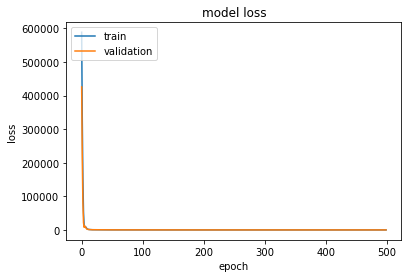

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## MANUAL TESTING

In [33]:
x_test = x.iloc[:10]
y_test = y.iloc[:10]

In [34]:
nn = model.predict(x_test).flatten()
ann_pred = nn.tolist()
lr = LRR.predict(x_test).flatten()
lr_pred = lr.tolist()
dt = DTR.predict(x_test).flatten()
dt_pred = dt.tolist()
rf = RFR.predict(x_test).flatten()
rf_pred = rf.tolist()

1/1 [==============================] - 1s 801ms/step


In [35]:
#Mean squred error
mse_ann = mean_squared_error(y_test, ann_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
mse_rf = mean_squared_error(y_test, rf_pred)

## COMPARING PREDICTED BHP VALUES TO THE ACTUAL BHP

In [36]:
new_df = {'ACTUAL BHP':y_test, 'ANN BHP':ann_pred, 'LR BHP':lr_pred, 'DT BHP':dt_pred,'RF BHP':rf_pred}
df = pd.DataFrame(new_df)
df

,ACTUAL BHP,ANN BHP,LR BHP,DT BHP,RF BHP
11,289.421362,289.817749,289.612995,289.421362,289.295567
12,270.239793,270.717926,270.598338,270.239793,270.569820
13,262.842747,262.052124,263.180376,262.842747,262.213271
14,255.526995,255.518951,255.887371,255.526995,257.682085
15,247.199052,246.665115,247.538774,253.090994,243.439277
16,240.736417,240.159103,241.059978,241.049122,238.264421
17,235.020931,234.494324,235.327963,235.020931,235.825657
18,232.743710,232.193771,233.027020,232.743710,232.637257
19,233.297778,232.871155,233.556659,233.297778,233.049101
20,231.088898,230.664001,231.336018,231.088898,231.043678


In [37]:
from operator import index


err_df = {'MSE_LR':mse_lr,'MSE_DT':mse_dt,'MSE_RF':mse_rf,'MSE_ANN':mse_ann}
df_err = pd.DataFrame(err_df, index=[1,2,3,4,5,6,7,8,9,10])
df_err

,MSE_LR,MSE_DT,MSE_RF,MSE_ANN
1,0.093186,3.481276,2.613487,0.257156
2,0.093186,3.481276,2.613487,0.257156
3,0.093186,3.481276,2.613487,0.257156
4,0.093186,3.481276,2.613487,0.257156
5,0.093186,3.481276,2.613487,0.257156
6,0.093186,3.481276,2.613487,0.257156
7,0.093186,3.481276,2.613487,0.257156
8,0.093186,3.481276,2.613487,0.257156
9,0.093186,3.481276,2.613487,0.257156
10,0.093186,3.481276,2.613487,0.257156


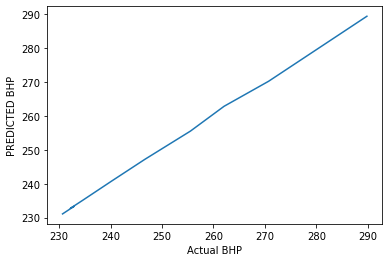

In [38]:
plt.plot(ann_pred, y_test)
plt.xlabel('Actual BHP')
plt.ylabel('PREDICTED BHP')
plt.show()

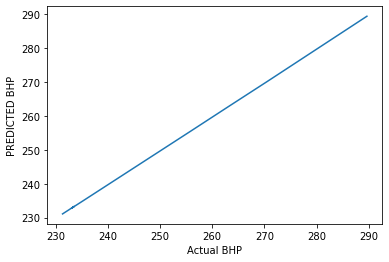

In [39]:
plt.plot(lr_pred, y_test)
plt.xlabel('Actual BHP')
plt.ylabel('PREDICTED BHP')
plt.show()

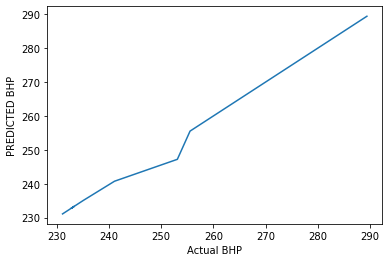

In [40]:
plt.plot(dt_pred, y_test)
plt.xlabel('Actual BHP')
plt.ylabel('PREDICTED BHP')
plt.show()

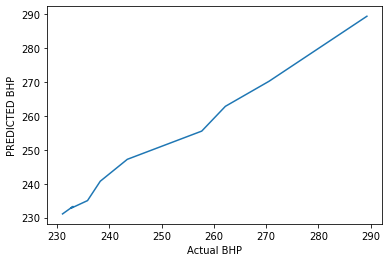

In [41]:
plt.plot(rf_pred, y_test)
plt.xlabel('Actual BHP')
plt.ylabel('PREDICTED BHP')
plt.show()

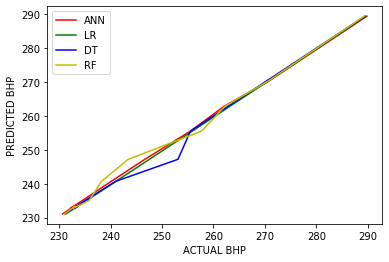

In [42]:
plt.plot(ann_pred, y_test, 'r',label= 'ANN')
plt.plot(lr_pred, y_test,'g',label= 'LR')
plt.plot(dt_pred, y_test,'b',label= 'DT')
plt.plot(rf_pred, y_test,'y',label= 'RF')
plt.xlabel('ACTUAL BHP')
plt.ylabel('PREDICTED BHP')
plt.legend()
plt.show()